# Loan Prediction (project-1)
Problem • A Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a data set.

# Data
• Variable Descriptions: Variable Description Loan_ID Unique Loan ID Gender Male/ Female Married Applicant married (Y/N) Dependents Number of dependents Education Applicant Education (Graduate/ Under Graduate) Self_Employed Self employed (Y/N) ApplicantIncome Applicant income CoapplicantIncome Coapplicant income LoanAmount Loan amount in thousands Loan_Amount_Term Term of loan in months Credit_History credit history meets guidelines Property_Area Urban/ Semi Urban/ Rural Loan_Status Loan approved (Y/N)

# Question
Predict whether a loan can be provided/granted to a particular person or not and if yes predict how much? (Classification and regression). You can use a dataset of your choice or from the internet. You can choose to combine 2 datasets too.

Step 1) ----Import libraries-----

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot 
import seaborn as sns
import math

In [13]:
###----------------------------------###

Step 2) ----Import dataset-----

In [14]:
train_data=pd.read_csv('C:/Users/joisp/Downloads/train.csv')

In [15]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
test_data=pd.read_csv("C:/Users/joisp/Downloads/test.csv")
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [17]:
train_data.shape

(614, 13)

In [18]:
test_data.shape

(367, 12)

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [20]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


# drawing plots for visualizing the dataset

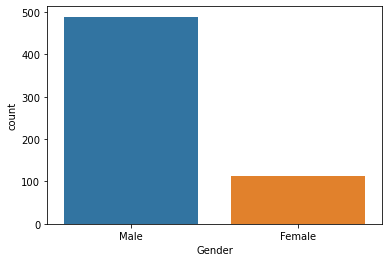

In [21]:
sns.countplot('Gender',data=train_data)

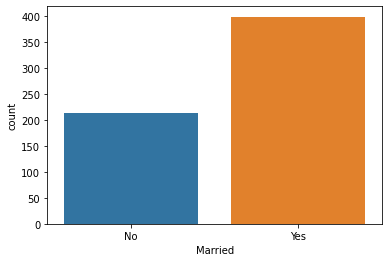

In [22]:
sns.countplot("Married",data=train_data)

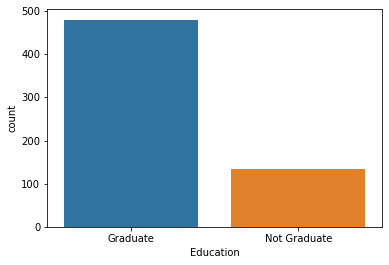

In [23]:
sns.countplot("Education",data=train_data)

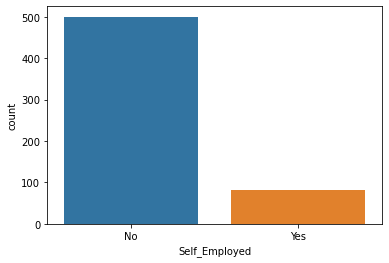

In [24]:
sns.countplot('Self_Employed',data=train_data)

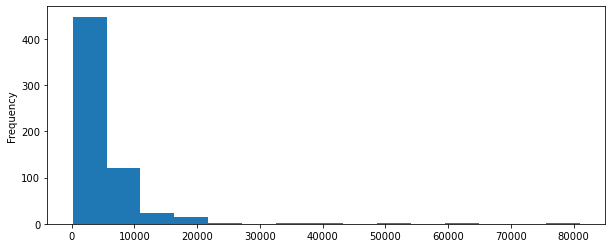

In [25]:
train_data['ApplicantIncome'].plot.hist(bins=15,figsize=(10,4))

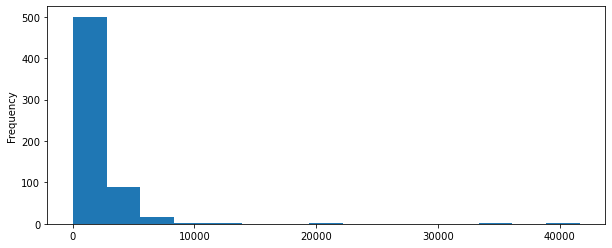

In [26]:
train_data['CoapplicantIncome'].plot.hist(bins=15,figsize=(10,4))

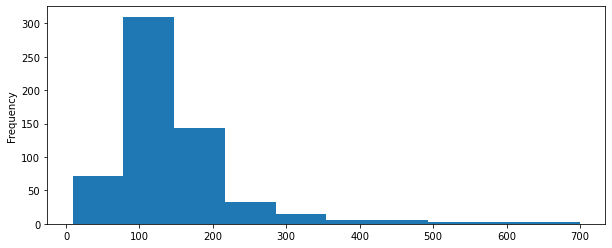

In [27]:
train_data['LoanAmount'].plot.hist(bins=10,figsize=(10,4))

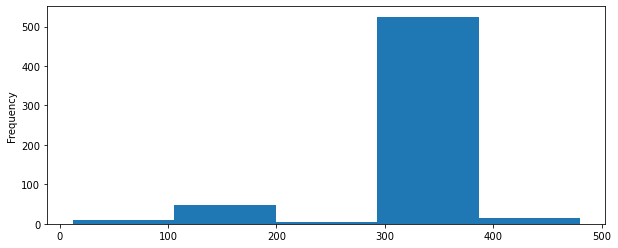

In [28]:
train_data['Loan_Amount_Term'].plot.hist(bins=5,figsize=(10,4))

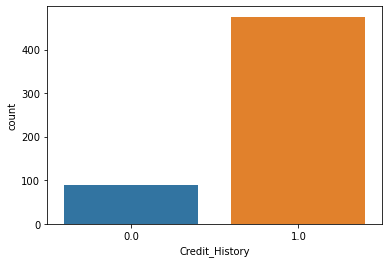

In [29]:
sns.countplot('Credit_History',data=train_data)

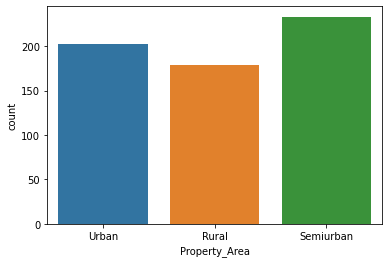

In [30]:
sns.countplot("Property_Area",data=train_data)

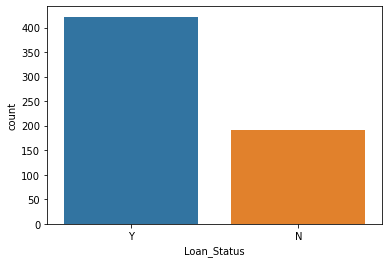

In [31]:
sns.countplot("Loan_Status",data=train_data)

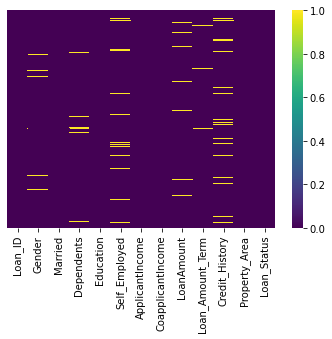

In [32]:
sns.heatmap(train_data.isnull(),yticklabels=False,cmap='viridis')

In [33]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
#Imputing Missing values with mean for continuous variable
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(), inplace=True)
#train_data['LoanAmount_log'].fillna(train_data['LoanAmount_log'].mean(), inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mean(), inplace=True)
train_data['ApplicantIncome'].fillna(train_data['ApplicantIncome'].mean(), inplace=True)
train_data['CoapplicantIncome'].fillna(train_data['CoapplicantIncome'].mean(), inplace=True)

In [35]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
#Imputing Missing values with mode for categorical variables
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)
#train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0],inplace=True)

In [37]:
train_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [38]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [39]:
Gender=pd.get_dummies(train_data['Gender'],drop_first=True)
Gender.head()

,Male
0,1
1,1
2,1
3,1
4,1


In [40]:
Education=pd.get_dummies(train_data['Education'],drop_first=True)
Education.head()         

,Not Graduate
0,0
1,0
2,0
3,1
4,0


In [41]:
Property_Area=pd.get_dummies(train_data['Property_Area'],drop_first=True)
Property_Area.head()

,Semiurban,Urban
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [42]:
Loan_Status=pd.get_dummies(train_data['Loan_Status'],drop_first=True)
Loan_Status.head()

,Y
0,1
1,0
2,1
3,1
4,1


In [43]:
Dependents=pd.get_dummies(train_data['Dependents'],drop_first=True)
Dependents.head()

,1,2,3+
0,0,0,0
1,1,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [44]:
Married=pd.get_dummies(train_data['Married'],drop_first=True)
Married.head()

,Yes
0,0
1,1
2,1
3,1
4,0


In [45]:
Self_Employed=pd.get_dummies(train_data['Self_Employed'],drop_first=True)
Self_Employed.head()

,Yes
0,0
1,0
2,1
3,0
4,0


In [46]:
train_data=pd.concat([train_data,Property_Area,Education,Gender,Loan_Status,Self_Employed,Married,Dependents],axis=1)

In [47]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Semiurban,Urban,Not Graduate,Male,Y,Yes,Yes,1,2,3+
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,...,0,1,0,1,1,0,0,0,0,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,...,0,0,0,1,0,0,1,1,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,...,0,1,0,1,1,1,1,0,0,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,...,0,1,1,1,1,0,1,0,0,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,...,0,1,0,1,1,0,0,0,0,0


In [48]:
train_data.drop(['Property_Area','Education','Gender','Loan_ID','Loan_Status','Married','Self_Employed','Dependents'],axis=1,inplace=True)

In [49]:
train_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Semiurban,Urban,Not Graduate,Male,Y,Yes,Yes,1,2,3+
0,5849,0.0,146.412162,360.0,1.0,0,1,0,1,1,0,0,0,0,0
1,4583,1508.0,128.000000,360.0,1.0,0,0,0,1,0,0,1,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,1,1,0,0,0
3,2583,2358.0,120.000000,360.0,1.0,0,1,1,1,1,0,1,0,0,0
4,6000,0.0,141.000000,360.0,1.0,0,1,0,1,1,0,0,0,0,0


In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
X=train_data.drop('Y',axis=1)
y=train_data['Y']

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [55]:
logmodel=LogisticRegression()

In [56]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [57]:
Yhat=logmodel.predict(X_train)
Yhat[0:5]

array([1, 1, 0, 0, 1], dtype=uint8)

In [60]:
predictions=logmodel.predict(X_test)
predictions[0:5]

array([1, 1, 1, 1, 1], dtype=uint8)

In [61]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.41      0.57        61
           1       0.77      0.98      0.87       124

    accuracy                           0.79       185
   macro avg       0.85      0.70      0.72       185
weighted avg       0.82      0.79      0.77       185



In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
confusion_matrix(y_test,predictions)

array([[ 25,  36],
       [  2, 122]], dtype=int64)

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(y_test,predictions)

0.7945945945945946

Now we try giving our own inputs and test weather the pearson will get loan approval or not.

In [68]:
logmodel.predict([[5849,0,146.412162,360.0,1,0,1,0,1,0,0,0,0,0]])

array([1], dtype=uint8)

In [ ]:
"""
if array[1] is the output then the loan is approved. 
"""

In [70]:
logmodel.predict_proba([[5849,0,146.412162,360.0,1,0,1,0,1,0,0,0,0,0]])

array([[0.25637056, 0.74362944]])

In [3]:
"""
 In the above o/p we can see that 25% for not approval and 74% of approval of the loan
"""
print()

In [ ]:
# ----------******----------------*******------------------------******-------------#